what is PCA?
- PCA, or Principal Component Analysis, is a statistical technique used for dimensionality reduction while preserving as much variance as possible in the data. It transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data. PCA is commonly used in data preprocessing, visualization, and feature extraction in machine learning and statistics.
- It helps in reducing the complexity of the data while retaining its essential patterns, making it easier to analyze and visualize high-dimensional datasets.
- PCA is particularly useful when dealing with high-dimensional data, as it can help to reduce noise and redundancy, making it easier to identify patterns and relationships within the data. It is widely used in various
- fields, including image processing, finance, and bioinformatics, to simplify complex datasets and improve the performance of machine learning algorithms.


#### PCA says:

"Instead of using the X and Y axes (height and diameter), why not rotate the coordinate system to follow the direction of the data?"

- So now, instead of saying:

Vase A: height = 20 cm, diameter = 5 cm
Vase B: height = 25 cm, diameter = 6 cm

- You can say:

Vase A: size = 1.2 units, shape = 0.3 units
Vase B: size = 1.5 units, shape = 0.1 units

- Where:

Size = overall size (capturing the combined effect of height & diameter)

Shape = how tall vs wide (a subtle variation)

- These new directions are called principal components

| Without Orthogonality                   | With Orthogonality (PCA)               |
| --------------------------------------- | -------------------------------------- |
| Components may repeat or correlate info | Each component adds unique information |
| Harder to interpret and visualize       | Easy to plot on perpendicular axes     |
| Redundant data remains                  | Redundancy is minimized                |


# PCA

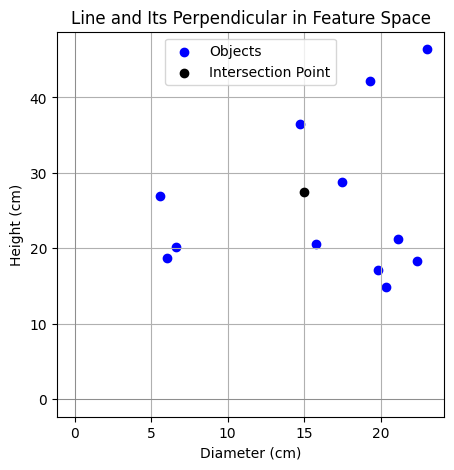

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Original data
data = {
    'diameter': [17.49, 23.01, 20.32, 19.27, 6.65, 6.01, 5.58, 15.80, 14.73, 22.35, 21.13, 19.84],
    'height':   [28.75, 46.40, 14.92, 42.25, 20.14, 18.71, 26.99, 20.63, 36.52, 18.33, 21.25, 17.07],
    'y' : [28.75, 46.40, 14.92, 42.25, 20.14, 18.71, 26.99, 20.63, 36.52, 18.33, 21.25, 17.07]
}
df = pd.DataFrame(data)

# Define the first line (e.g. y = 1.5x + 5)
x_vals = np.linspace(df['diameter'].min(), df['diameter'].max(), 100)
y_vals = 1.5 * x_vals + 5  # Line A

# Choose a point to make perpendicular line pass through
# Let’s take a point on the original line (e.g., x = 15)
x0 = 15
y0 = 1.5 * x0 + 5

# Perpendicular slope
m_perp = -1 / 1.5

# Equation of perpendicular line: y - y0 = m_perp * (x - x0)
# Solve for y
y_perp = m_perp * (x_vals - x0) + y0

# Plotting
plt.figure(figsize=(5, 5))
plt.scatter(df['diameter'], df['height'], color='blue', label='Objects')

plt.scatter(x0, y0, color='black', zorder=5, label='Intersection Point')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

plt.xlabel('Diameter (cm)')
plt.ylabel('Height (cm)')
plt.title('Line and Its Perpendicular in Feature Space')
plt.legend()
plt.grid(True)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

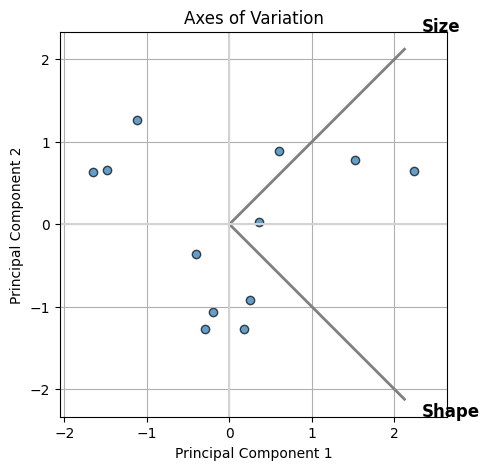

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['height', 'diameter']])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='black')

# Plot PCA axes
for length, vector, name in zip(pca.explained_variance_, pca.components_, ['Size', 'Shape']):
    v = vector * 3  # scale arrow length
    plt.plot([0, v[0]], [0, v[1]], color='gray', linewidth=2)
    plt.text(v[0]*1.1, v[1]*1.1, name, fontsize=12, weight='bold')

plt.axhline(0, color='lightgray')
plt.axvline(0, color='lightgray')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Axes of Variation")
plt.grid(True)
plt.axis('equal')
plt.show


In [10]:
# principal component analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
transformed_data = pca.transform(df)
transformed_df = pd.DataFrame(transformed_data, columns=['shape', 'size'])


# Bias and Variance

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [304]:
X = (np.linspace(0, 10, 100))
y = np.sin(X)

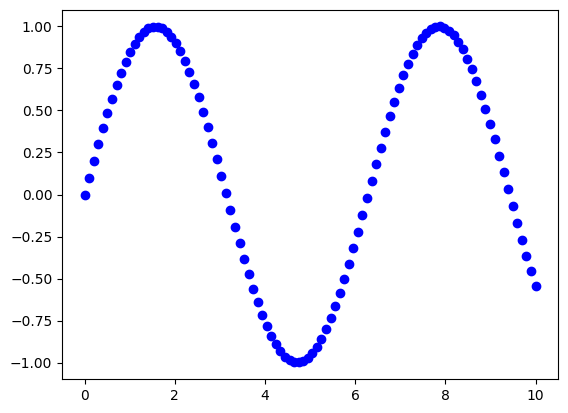

In [305]:
plt.scatter(X, y, color='blue', label='Data Points')

In [306]:
def make_matrix(X, dim):
    return np.vander(X, dim + 1, increasing=True)
def LeastSquares(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Normal equation
    return theta
def predict(X, theta):
    return X @ theta

def fit(X, y, dim):
    X_poly = make_matrix(X, dim)
    betas = LeastSquares(X_poly, y)
    return betas

In [307]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# sort
X_train, Y_train = zip(*sorted(zip(X_train, Y_train)))
X_test, Y_test = zip(*sorted(zip(X_test, Y_test)))

In [322]:
deg = [1, 4, 7]

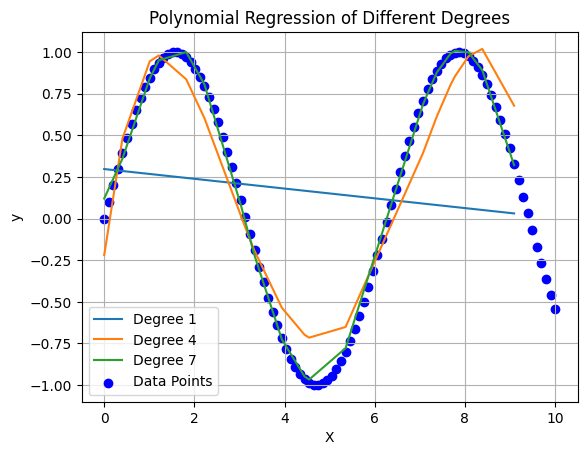

In [323]:
for d in deg:
    y_pred = predict(make_matrix(X_test, d), fit(X_train, Y_train, d))
    plt.plot(X_test, y_pred, label=f'Degree {d}')
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y') 
plt.title('Polynomial Regression of Different Degrees')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# continous data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [30]:
X = np.linspace(0, 10, 100)
Y = np.sin(X)
X.shape

(100,)

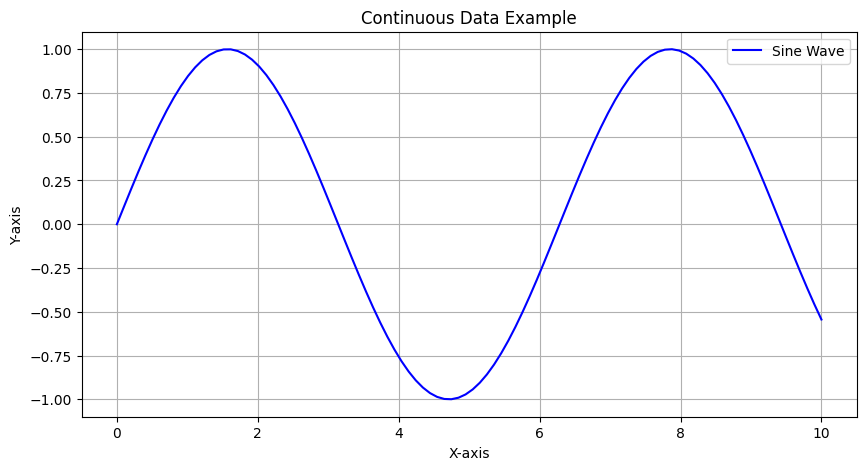

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, Y, label='Sine Wave', color='blue')
plt.title('Continuous Data Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)l
plt.legend()
plt.show()

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape(-1, 1), Y, test_size=0.2, random_state=381)

In [43]:
def LeastSquares(X, y, dim):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    # add dimensions and make X multinomial
    for i in range(2, dim + 1):
        X = np.hstack((X, X[:, 1:] ** i))
        print(X[:3])
    
    theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Normal equation
    return theta


In [44]:
theta = LeastSquares(X_train, Y_train, dim=1)
theta2 = LeastSquares(X_train, Y_train, dim=3)
# Plotting the results


[[ 1.          9.7979798  96.00040812]
 [ 1.          0.80808081  0.65299459]
 [ 1.          3.33333333 11.11111111]]
[[1.00000000e+00 9.79797980e+00 9.60004081e+01 9.40610059e+02
  8.84747284e+05]
 [1.00000000e+00 8.08080808e-01 6.52994592e-01 5.27672398e-01
  2.78438159e-01]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.37174211e+03]]


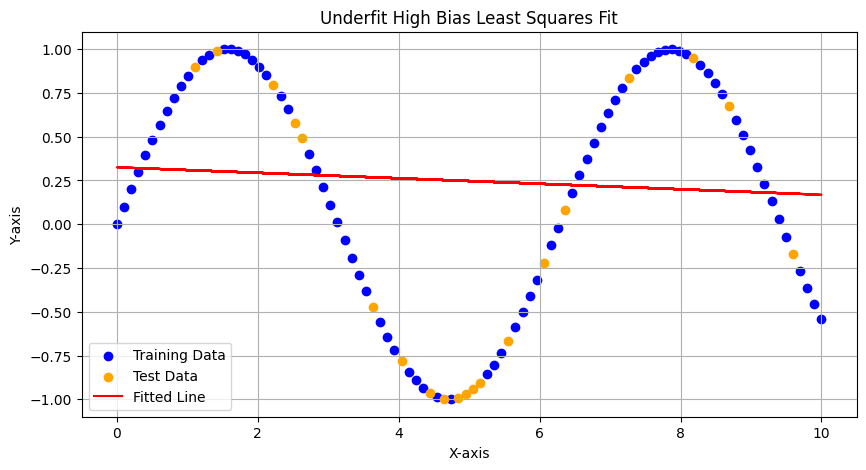

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='orange', label='Test Data')
plt.plot(X_train, X_train @ theta[1:] + theta[0], color='red', label='Fitted Line')
plt.title('Underfit High Bias Least Squares Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()    
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

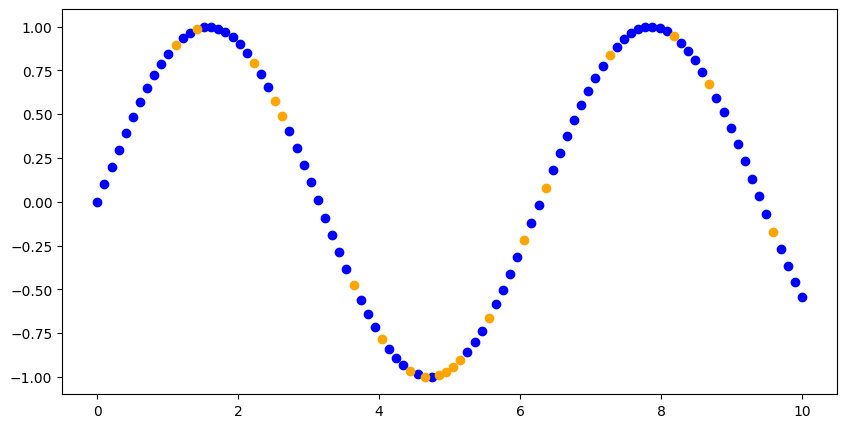

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_test, color='orange', label='Test Data')
plt.plot(X_train, X_train @ theta2[1:] + theta2[0], color='red', label='Fitted Line')
plt.title('Underfit High Bias Least Squares Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()    
plt.show()

In [16]:
score = np.sqrt(np.mean((X_test @ theta[1:] + theta[0] - Y_test) ** 2))
print(f"Root Mean Squared Error: {score:.4f}")
print(f"Mean {X.mean()}, Std Dev: {X.std()}")


Root Mean Squared Error: 0.8367
Mean 5.0, Std Dev: 2.9157646512850626
